# Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Data understanding

## Reading the dataset (csv file) into Pandas dataframe

In [2]:
housing_file_path = "/content/DataSet_LakasArak_labeled.csv"
housing = pd.DataFrame(pd.read_csv(housing_file_path))

## Exploring the dataframe

In [3]:
# Check the head of the dataset
housing.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,split
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,test
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,train
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,train
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,train
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,test


In [4]:
housing.shape

(78539, 23)

In [5]:
# The dataset shape shows the number of instances and features in the dataset
num_instances = housing.shape[0] #Rows
num_features = housing.shape[1] #Columns
num_instances, num_features

(78539, 23)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78539 entries, 0 to 78538
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county                   78539 non-null  object 
 1   city                     77980 non-null  object 
 2   postcode                 49585 non-null  float64
 3   property_type            78539 non-null  object 
 4   property_subtype         76880 non-null  object 
 5   property_condition_type  78539 non-null  object 
 6   property_floor           74746 non-null  object 
 7   building_floor_count     36429 non-null  object 
 8   view_type                42878 non-null  object 
 9   orientation              47647 non-null  object 
 10  garden_access            17200 non-null  object 
 11  heating_type             67233 non-null  object 
 12  elevator_type            64388 non-null  object 
 13  room_cnt                 78539 non-null  float64
 14  small_room_cnt        

In [7]:
housing.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
count,49585.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000
mean,1103.358980,1.467666,0.559875,48.440584,1.953182,19.341475,259.599320,44.173684,196334.093240
std,50.769326,0.599840,0.737015,12.716653,4.677227,8.900296,512.351553,47.821006,113305.083861
min,1011.000000,0.000000,0.000000,5.000000,0.000000,0.200000,0.000000,1.000000,4.000000
25%,1064.000000,1.000000,0.000000,40.000000,0.000000,13.200000,42.000000,11.000000,97959.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,103.000000,28.000000,196095.000000
75%,1142.000000,2.000000,1.000000,60.000000,3.000000,23.900000,263.000000,61.000000,294516.500000
max,1239.000000,7.000000,4.000000,70.000000,97.000000,99.600000,28096.000000,537.000000,394181.000000


In [8]:
# Check for null values in the dataset
housing_null = housing.isnull().sum()
housing_null

,0
county,0
city,559
postcode,28954
property_type,0
property_subtype,1659
property_condition_type,0
property_floor,3793
building_floor_count,42110
view_type,35661
orientation,30892


## Features and ground truth labels

In [9]:
# One of the columns contains the prices. In this task, we need to predict the prices
# based on some information that we have; thus, this column is the ground truth label.
# 'price_created_at' column has the ground truth label that we are going to use in
# training and testing later.
gt_feature = 'price_created_at'

We are going to predict the prices based on the information that we have.
The target column for prediction is "Price_created_at".

# Data preparation

In [10]:
# As we learned earlier, prepare the data for the next steps (e.g. train and test).
# You might use all the available features or part of them. Please justify your choices.
# Attention!!! Do not frop any N/A value.
# ...

We are not going to drop any missing values due to the requirement of the task. So let's apply appropiate strategies such as imputing missing values or using techniques to handle them.

In [11]:
# Let's check again which columns have missing values
housing_null[housing_null > 0]

,0
city,559
postcode,28954
property_subtype,1659
property_floor,3793
building_floor_count,42110
view_type,35661
orientation,30892
garden_access,61339
heating_type,11306
elevator_type,14151


Several columns have missing values, we need to handle them without dropping any data.
Our decision is gonna be:
**Imputation of data**
 - For missing numerical data, we will use the median
 - For missing categorical data, we will use the mode



In [12]:
# Let's verify which values have the different features with Nan values

unique_city_values = housing['city'].unique()
unique_postcode_values = housing['postcode'].unique()
unique_property_subtype_values = housing['property_subtype'].unique()

unique_property_floor_values = housing['property_floor'].unique()
unique_building_floor_count_values = housing['building_floor_count'].unique()

unique_view_type_values = housing['view_type'].unique()
unique_orientation_values = housing['orientation'].unique()
unique_garden_access_values = housing['garden_access'].unique()
unique_heating_type_values = housing['heating_type'].unique()
unique_elevator_type_values = housing['elevator_type'].unique()

unique_city_values, unique_postcode_values, unique_property_subtype_values, unique_property_floor_values, unique_building_floor_count_values, unique_view_type_values, unique_orientation_values, unique_garden_access_values, unique_heating_type_values, unique_elevator_type_values


(array(['Budapest XII.', 'Budapest I.', 'Budapest XVI.', 'Budapest X.',
        'Budapest XVIII.', 'Budapest XI.', 'Budapest III.',
        'Budapest XIV.', 'Budapest IX.', 'Budapest VIII.', 'Budapest XX.',
        'Budapest XIII.', 'Budapest XV.', 'Budapest V.', 'Budapest VI.',
        'Budapest VII.', 'Budapest XIX.', 'Budapest IV.', 'Budapest XVII.',
        'Budapest II.', 'Budapest XXI.', nan, 'Budapest XXIII.',
        'Budapest XXII.'], dtype=object),
 array([  nan, 1016., 1164., 1181., 1032., 1097., 1084., 1203., 1134.,
        1118., 1123., 1152., 1053., 1062., 1139., 1112., 1153., 1033.,
        1147., 1061., 1035., 1036., 1146., 1031., 1098., 1205., 1137.,
        1083., 1111., 1066., 1122., 1087., 1136., 1135., 1114., 1055.,
        1142., 1156., 1073., 1165., 1075., 1157., 1056., 1027., 1063.,
        1171., 1155., 1044., 1149., 1047., 1125., 1085., 1141., 1096.,
        1042., 1068., 1238., 1195., 1089., 1072., 1067., 1074., 1024.,
        1108., 1138., 1132., 1237., 1225

From the 10 columns with missing data, we will consider **postcode, property_floor and building_floor_count** as numericals, the other ones have categorical data.

In [13]:
# Mapping non-numeric values to numeric equivalents for "property_floor"
housing['property_floor'] = housing['property_floor'].replace({
    'ground floor': 0,
    'basement': -1,
    'mezzanine floor': 0.5,
    '10 plus': 11
})

In [14]:
# Mapping non-numeric values to numeric equivalents for "building_floor_count"
housing['building_floor_count'] = housing['building_floor_count'].replace({
    'more than 10': 11
})

In [15]:
# Convert 'property_floor' and 'building_floor_count' to float64
housing['property_floor'] = housing['property_floor'].astype('float64')
housing['building_floor_count'] = housing['building_floor_count'].astype('float64')

# Verify the changes
housing[['property_floor', 'building_floor_count']].dtypes

,0
property_floor,float64
building_floor_count,float64


In [16]:
# Impute missing values for numerical columns with the median
numerical_columns = ['postcode', 'property_floor', 'building_floor_count']
housing[numerical_columns] = housing[numerical_columns].fillna(housing[numerical_columns].median())

# Impute missing values for categorical columns with the mode (most frequent value)
categorical_columns = ['city', 'property_subtype', 'view_type', 'orientation', 'garden_access', 'heating_type', 'elevator_type']
housing[categorical_columns] = housing[categorical_columns].fillna(housing[categorical_columns].mode().iloc[0])

# Verify that missing values have been handled
housing.isnull().sum().sum()


0

Now we verified that we have "0" null values in our data.

In [17]:
housing.describe()

,postcode,property_floor,building_floor_count,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
count,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000
mean,1102.489324,2.597951,4.644075,1.467666,0.559875,48.440584,1.953182,19.341475,259.599320,44.173684,196334.093240
std,40.355713,2.500671,2.153327,0.599840,0.737015,12.716653,4.677227,8.900296,512.351553,47.821006,113305.083861
min,1011.000000,-1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.200000,0.000000,1.000000,4.000000
25%,1083.000000,1.000000,4.000000,1.000000,0.000000,40.000000,0.000000,13.200000,42.000000,11.000000,97959.000000
50%,1101.000000,2.000000,4.000000,1.000000,0.000000,50.000000,0.000000,16.900000,103.000000,28.000000,196095.000000
75%,1118.000000,4.000000,4.000000,2.000000,1.000000,60.000000,3.000000,23.900000,263.000000,61.000000,294516.500000
max,1239.000000,11.000000,11.000000,7.000000,4.000000,70.000000,97.000000,99.600000,28096.000000,537.000000,394181.000000


We have to decide which features to use for training and testing the model, we have to consider the relevance and the impact on predicting the target variable "price_created_at". That's why we are gonna check all the data and see which ones can be replaced into numerical values.

In [18]:
unique_values_all_columns = {col: housing[col].unique() for col in housing.columns}
unique_values_all_columns

{'county': array(['Budapest'], dtype=object),
 'city': array(['Budapest XII.', 'Budapest I.', 'Budapest XVI.', 'Budapest X.',
        'Budapest XVIII.', 'Budapest XI.', 'Budapest III.',
        'Budapest XIV.', 'Budapest IX.', 'Budapest VIII.', 'Budapest XX.',
        'Budapest XIII.', 'Budapest XV.', 'Budapest V.', 'Budapest VI.',
        'Budapest VII.', 'Budapest XIX.', 'Budapest IV.', 'Budapest XVII.',
        'Budapest II.', 'Budapest XXI.', 'Budapest XXIII.',
        'Budapest XXII.'], dtype=object),
 'postcode': array([1101., 1016., 1164., 1181., 1032., 1097., 1084., 1203., 1134.,
        1118., 1123., 1152., 1053., 1062., 1139., 1112., 1153., 1033.,
        1147., 1061., 1035., 1036., 1146., 1031., 1098., 1205., 1137.,
        1083., 1111., 1066., 1122., 1087., 1136., 1135., 1114., 1055.,
        1142., 1156., 1073., 1165., 1075., 1157., 1056., 1027., 1063.,
        1171., 1155., 1044., 1149., 1047., 1125., 1085., 1141., 1096.,
        1042., 1068., 1238., 1195., 1089., 1072., 

From all the features, we will not use the next ones:
- County: only contains "Budapest", not useful.
- property_type: only contains "flat" , not useful.
- created_at : not useful for prediction
- ad_view_cnt: not useful for this prediction
- active_days: not useful for prediction
- nr: identifier, not useful

In [19]:
# Let's drop those columns
housing_cleaned = housing.drop(['county', 'property_type', 'created_at', 'ad_view_cnt', 'active_days', 'nr'], axis=1)

housing_cleaned.columns

Index(['city', 'postcode', 'property_subtype', 'property_condition_type',
       'property_floor', 'building_floor_count', 'view_type', 'orientation',
       'garden_access', 'heating_type', 'elevator_type', 'room_cnt',
       'small_room_cnt', 'property_area', 'balcony_area', 'price_created_at',
       'split'],
      dtype='object')

In [20]:
unique_values_housing_cleaned = {col: housing_cleaned[col].unique() for col in housing_cleaned.columns}
unique_values_housing_cleaned

{'city': array(['Budapest XII.', 'Budapest I.', 'Budapest XVI.', 'Budapest X.',
        'Budapest XVIII.', 'Budapest XI.', 'Budapest III.',
        'Budapest XIV.', 'Budapest IX.', 'Budapest VIII.', 'Budapest XX.',
        'Budapest XIII.', 'Budapest XV.', 'Budapest V.', 'Budapest VI.',
        'Budapest VII.', 'Budapest XIX.', 'Budapest IV.', 'Budapest XVII.',
        'Budapest II.', 'Budapest XXI.', 'Budapest XXIII.',
        'Budapest XXII.'], dtype=object),
 'postcode': array([1101., 1016., 1164., 1181., 1032., 1097., 1084., 1203., 1134.,
        1118., 1123., 1152., 1053., 1062., 1139., 1112., 1153., 1033.,
        1147., 1061., 1035., 1036., 1146., 1031., 1098., 1205., 1137.,
        1083., 1111., 1066., 1122., 1087., 1136., 1135., 1114., 1055.,
        1142., 1156., 1073., 1165., 1075., 1157., 1056., 1027., 1063.,
        1171., 1155., 1044., 1149., 1047., 1125., 1085., 1141., 1096.,
        1042., 1068., 1238., 1195., 1089., 1072., 1067., 1074., 1024.,
        1108., 1138., 113

We will use label encoding, replacing categories with an unique number, we will do that in features like:
- city
- property_subtype
- property_condition_type
- view_type
- orientation
- garden_access
- heating_type
- elevator_type

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['city', 'property_subtype', 'property_condition_type', 'view_type', 'orientation', 'garden_access', 'heating_type', 'elevator_type']

# Dictionary to store the mappings
category_mappings = {}

for col in categorical_columns:
    # Store the original values before encoding
    original_values = housing_cleaned[col].astype(str)
    housing_cleaned[col] = label_encoder.fit_transform(original_values)
    # Store the mapping of original categories to their encoded numbers
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Let's print the mappings
for col, mapping in category_mappings.items():
    print(f"Mapping for {col}:")
    for category, encoded_value in mapping.items():
        print(f"  {category} : {encoded_value}")
    print()


Mapping for city:
  Budapest I. : 0
  Budapest II. : 1
  Budapest III. : 2
  Budapest IV. : 3
  Budapest IX. : 4
  Budapest V. : 5
  Budapest VI. : 6
  Budapest VII. : 7
  Budapest VIII. : 8
  Budapest X. : 9
  Budapest XI. : 10
  Budapest XII. : 11
  Budapest XIII. : 12
  Budapest XIV. : 13
  Budapest XIX. : 14
  Budapest XV. : 15
  Budapest XVI. : 16
  Budapest XVII. : 17
  Budapest XVIII. : 18
  Budapest XX. : 19
  Budapest XXI. : 20
  Budapest XXII. : 21
  Budapest XXIII. : 22

Mapping for property_subtype:
  brick flat (for sale) : 0
  prefabricated panel flat (for sale) : 1

Mapping for property_condition_type:
  can_move_in : 0
  good : 1
  medium : 2
  missing_info : 3
  new_construction : 4
  novel : 5
  renewed : 6
  to_be_renovated : 7
  under_construction : 8

Mapping for view_type:
  courtyard view : 0
  garden view : 1
  panoramic : 2
  street view : 3

Mapping for orientation:
  east : 0
  north : 1
  north-east : 2
  north-west : 3
  south : 4
  south-east : 5
  south-w

In [22]:
# Let's Check the head of the new dataset
housing_cleaned.head()

,city,postcode,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,split
0,11,1101.0,0,1,1.0,4.0,3,0,0,9,1,2.0,1.0,65.0,0.0,23.5,test
1,0,1016.0,0,5,2.0,4.0,3,0,0,7,1,1.0,1.0,45.0,0.0,20.0,train
2,16,1164.0,0,5,1.0,4.0,1,0,0,1,1,2.0,1.0,60.0,0.0,22.0,train
3,9,1101.0,0,1,4.0,4.0,1,0,0,0,0,2.0,0.0,55.0,4.0,11.0,train
4,18,1181.0,1,6,6.0,4.0,3,0,0,7,1,2.0,1.0,60.0,3.0,10.2,test


In [23]:
housing_cleaned.shape

(78539, 17)

We should check from the new 16 features (17 if we count split) the most useful ones to have an outlier detection. This ones are:
- property_area
- room_cnt
- small_room_cnt
- balcony_area
- price_created_at

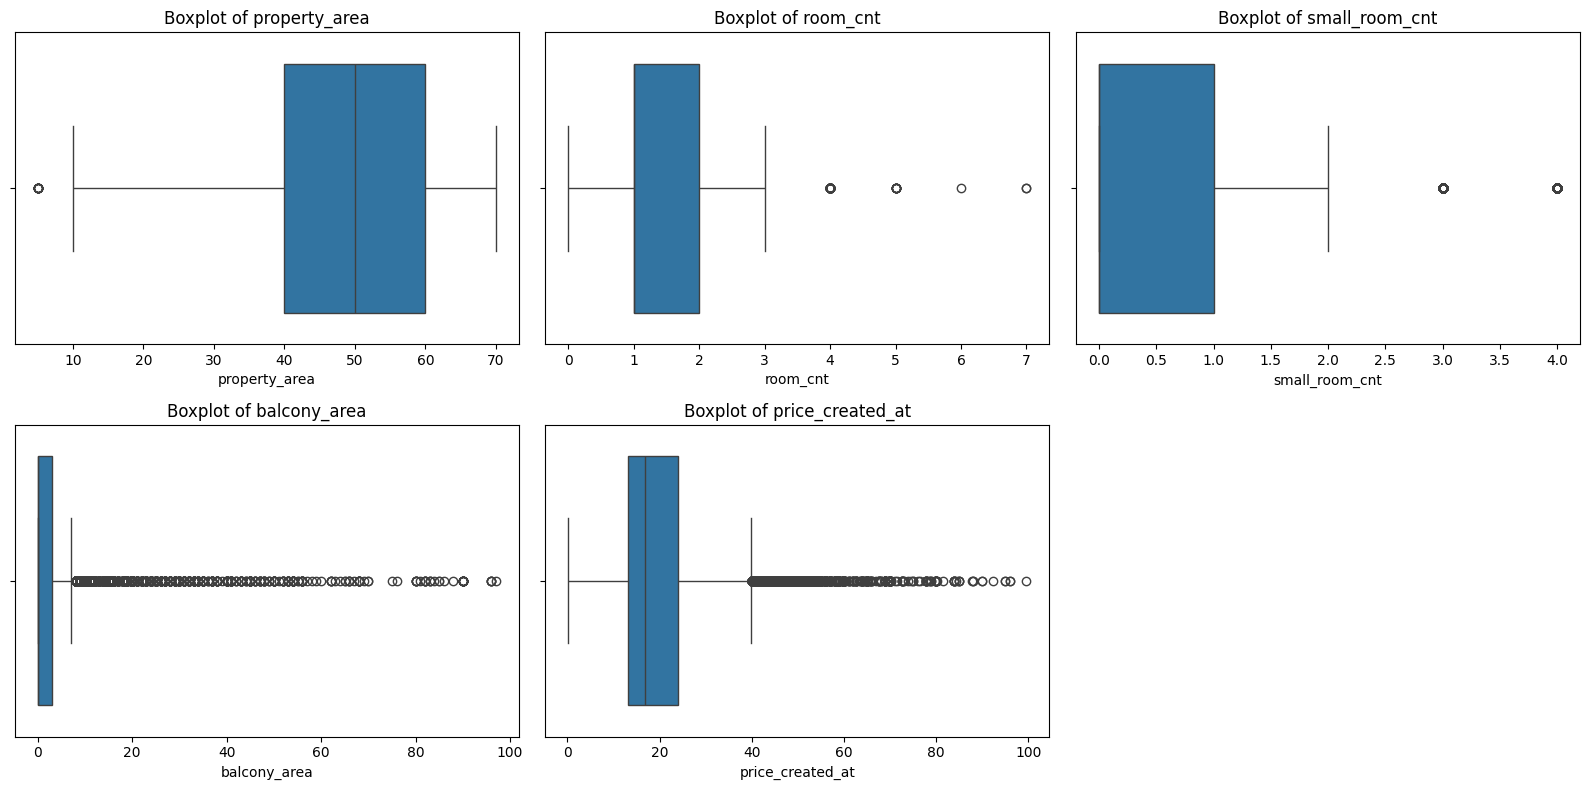

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_columns = ['property_area', 'room_cnt', 'small_room_cnt', 'balcony_area', 'price_created_at']

# Box plots to visually detect outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=housing_cleaned[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# IQR method to detect outliers for each feature
outliers = {}
for col in numerical_columns:
    Q1 = housing_cleaned[col].quantile(0.25)
    Q3 = housing_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


- Based on the result, we will modify the balcony area, we will cap the extreme values at a reasonable threshold, keeping the majority of the data while we reduce the influence of those extreme values

- We will not fo anything with the prices cause its the target variable.

In [26]:
# Cap the balcony_area at the 95th percentile
cap_value = housing_cleaned['balcony_area'].quantile(0.95)
housing_cleaned['balcony_area'] = housing_cleaned['balcony_area'].clip(upper=cap_value)

# Print the new distribution after capping
print(housing_cleaned['balcony_area'].describe())


count    78539.000000
mean         1.546722
std          2.495450
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max          8.000000
Name: balcony_area, dtype: float64


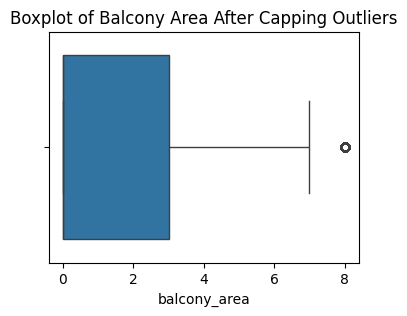

In [27]:
#Let's check the new boxplot
plt.figure(figsize=(4, 3))
sns.boxplot(x=housing_cleaned['balcony_area'])
plt.title("Boxplot of Balcony Area After Capping Outliers")
plt.show()

## Holding out a test set for performance evaluation

In [28]:
# 1- We need to decide how much of the data is used for testing.
#    In this experiment the data is labeled beforehand, we have 30% of the data for testing purposes.
# 2- How many instances do we have for training and testing?

train_set = housing_cleaned[housing_cleaned['split']=='train']
test_set = housing_cleaned[housing_cleaned['split']=='test']

train_set.shape, test_set.shape

((54977, 17), (23562, 17))

In [29]:
# The following is just to assert that the data is complete and none of the instances was dropped
test_perc = 0.3
train_perc = 1 - test_perc

assert (len(train_set) + len(test_set)) == num_instances
assert (len(train_set)) == int(train_perc*num_instances)
assert (len(test_set)) == (num_instances - len(train_set))

# Model selection

In [30]:
# After the data preperation/preprocessing step, the list of selected features (as strings) should be saved into a list in the form:
# features = [feature1, feature2, ...]

# Exclude the target 'price' and the 'split' column which indicates training/testing set
features = housing_cleaned.columns.difference(['price_created_at', 'split']).tolist()

# Now let's print the selected features
print(features)


['balcony_area', 'building_floor_count', 'city', 'elevator_type', 'garden_access', 'heating_type', 'orientation', 'postcode', 'property_area', 'property_condition_type', 'property_floor', 'property_subtype', 'room_cnt', 'small_room_cnt', 'view_type']


In [31]:
# We need to create features and ground truth sets for both train and test splits that we have. Use 'features' and 'gt_feature'.

# Define the ground truth feature (target)
gt_feature = 'price_created_at'

# Create feature sets and ground truth sets
X_train = train_set[features]
y_train = train_set[gt_feature]
X_test = test_set[features]
y_test = test_set[gt_feature]

# Check the shapes of the sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((54977, 15), (54977,), (23562, 15), (23562,))

In [32]:
# For prediction, you should use the following function. As you can see, it is incomplete, please fill the gaps.
# The selected model has to learn the features in the data before giving an educated prediction. Why?
# We first fit the model using the train data, then use it to predict labels (prices) for the test instances. Why?

def model_predict(model, X_train, y_train, X_test):
    # fit the model using training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    pred = model.predict(X_test)

    return model, pred


**Why do we fit the model first?**

The model needs to recognize patterns and connections in the training data. When we train the model, we teach it how the features are linked to the target variable. This helps us make accurate predictions.

**Why do we use the model to predict on test instances after training?**

After training the model with the training data, we apply it to the test set to see how well it performs on new, unseen data. This helps us check if the model can generalize and make accurate predictions on new data.

In [33]:
# Using the selected models, You can make the predictions using 'model_predict' function. Please save the returned values so we can check their performance.
# ...

In [34]:
model_1 = LinearRegression()
model_1, pred_1 = model_predict(model_1, X_train, y_train, X_test)

model_2 = GradientBoostingRegressor()
model_2, pred_2 = model_predict(model_2, X_train, y_train, X_test)

model_3 = RandomForestRegressor()
model_3, pred_3 = model_predict(model_3, X_train, y_train, X_test)

# Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
# For evaluation we use Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Square Error (RMSE).
# Please complete the following function:

def model_evaluate(pred, target):
    # Mean Absolute Error
    mae = mean_absolute_error(target, pred)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((target - pred) / target)) * 100

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(target, pred))

    return mae, mape, rmse

- **MAE:** The mean of the absolute differences between the predicted and actual values.

- **MAPE:** The mean of the absolute percentage errors, which tells you how large the error is in percentage terms.

- **RMSE:** The square root of the mean of squared differences between predicted and actual values.

In [37]:
# Check and compare the performance for all the models. Do you find any interesting observtions(s)? What are your conclusion(s)?

In [38]:
# Model 1 (Linear Regression)
mae_1, mape_1, rmse_1 = model_evaluate(pred_1, y_test)
print(f"Linear Regression\nMAE: {mae_1}, MAPE: {mape_1}, RMSE: {rmse_1}\n")

# Model 2 (Gradient Boosting Regressor)
mae_2, mape_2, rmse_2 = model_evaluate(pred_2, y_test)
print(f"Gradient Boosting\nMAE: {mae_2}, MAPE: {mape_2}, RMSE: {rmse_2}\n")

# Model 3 (Random Forest Regressor)
mae_3, mape_3, rmse_3 = model_evaluate(pred_3, y_test)
print(f"Random Forest\nMAE: {mae_3}, MAPE: {mape_3}, RMSE: {rmse_3}")


Linear Regression
MAE: 4.771694702872325, MAPE: 27.231838315206453, RMSE: 6.687216968969481

Gradient Boosting
MAE: 3.4282513983245835, MAPE: 18.448015682701378, RMSE: 5.224249071806176

Random Forest
MAE: 2.3099596482162466, MAPE: 12.567398696004824, RMSE: 4.145493238694223


## Conclusions

1. In the MAE, Linear regression has the highest one 4.77, providing the far away predictions compared to Random forest which is the closest one with 2.31.

2. In the MAPE, Linear regression still has the highest one, which varies a 27.23% from the actual values, more than Random Forest, who has a 12.57%.

3. In the RMSE, Linear regression still has the highest vale with 6.69, tending to make larger errors compared to the other ones, random forest still have the less amount of errors with 4.15.

4. Clearly **RANDOM FOREST REGRESSOR** is clearly the best performing model across all metrics. Its the most accurate for predictions. The following model is **GRADIENT BOOSTING** is not the best but has average results. And at the end **LINEAR REGRESSION** has the worst performance, which means the relationships in the data are not the best for this model.